In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

from scipy.stats import binned_statistic

In [11]:
baseline_file = '../baseline/baseline_v3.3_10yrs.db'
name = os.path.basename(baseline_file).replace('.db','')
resultsDb = maf.db.ResultsDb(out_dir='tmp')

In [12]:
bundleList = []
# The point on the sky we would like to get visits for
ra = [268.708]
dec = [-28.975]


# Say we just want to pass data through, not compute anything. Documentation on the columns coming soon.
metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
# Select all the visits
sql = ''
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
bundleList.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

In [13]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=outDir, results_db=resultsDb)
bg.run_all()

In [16]:
seasons = rsUtils.calc_season(ra[0], bundleList[0].metric_values[0]['observationStartMJD'])

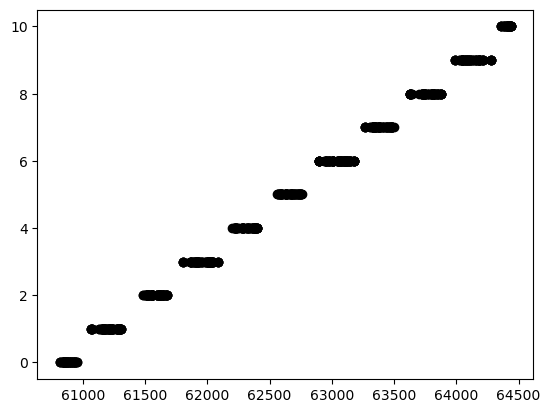

In [18]:
plt.plot(bundleList[0].metric_values[0]['observationStartMJD'], np.floor(seasons), 'ko')

In [20]:
# Let's find the median observation date per seasons and pretend that's a good enough time to center on
med_seasons, _be, _bn = binned_statistic(np.floor(seasons),
                               bundleList[0].metric_values[0]['observationStartMJD'], statistic=np.median, bins=np.arange(11)-0.5)

In [21]:
med_seasons

array([60872.0194637 , 61213.13746731, 61559.342111  , 61947.2986307 ,
       62318.80845182, 62670.27433717, 63067.21554347, 63381.39872344,
       63773.23734278, 64107.76113675])